<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluno [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)


---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [59]:
import seaborn as sns

data1 = sns.load_dataset("diamonds")
# data1
data1.head()
# data1['price'].max()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


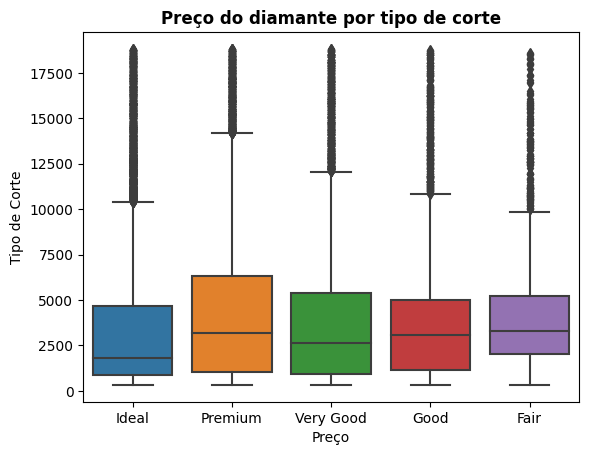

In [60]:
# gráfico do exercício 1

# Crie o gráfico de colunas
# grafico = sns.barplot(data=data1, x="cut", y="price", errorbar=None, palette="pastel")
# grafico.set(title="Preço do diamante por tipo de corte", xlabel='Preço', ylabel='Tipo de Corte');

# Crie o gráfico de caixa
diamonds = sns.boxplot( data=data1, x='cut' , y='price')
diamonds.set_title("Preço do diamante por tipo de corte", fontsize=12, fontweight="bold");
diamonds.set_xlabel("Preço", fontsize=10);
diamonds.set_ylabel("Tipo de Corte", fontsize=10);


**Insight do gráfico 1**: Os gráficos de caixa para cada tipo de corte indicam que cortes "Premium" e "Very Good" apresentaram faixa de preços mais elevados. O tipo "Fair" apresentou mediana, ou valor ao meio, mais elevado.

---

## 2\. Número de passageiros em dezembro por ano

In [61]:
import seaborn as sns

data2 = sns.load_dataset("flights")
data2.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


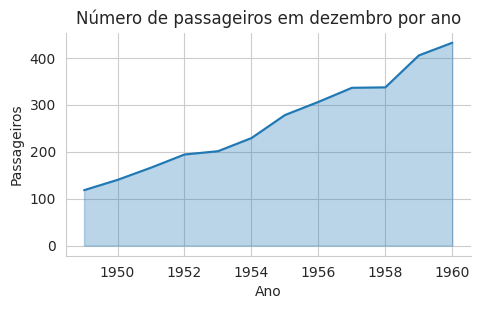

In [62]:
# gráfico do exercício 2
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):

  flights = sns.FacetGrid(data=data2[data2['month'] == 'Dec'])
  flights.map(sns.lineplot, "year", "passengers")
  flights.map(plt.fill_between, 'year', 'passengers', alpha=0.3)
  flights.set(title='Número de passageiros em dezembro por ano', xlabel='Ano', ylabel='Passageiros');
  flights.fig.set_size_inches(w=15/2.54, h=7.5/2.54)


**Insight do gráfico 2**: O gráfico de linha mostra uma tendência de aumento do número de passageiros ao longo dos anos durante o mês de dezembro.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [63]:
import seaborn as sns

data3 = sns.load_dataset("flights")
data3.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


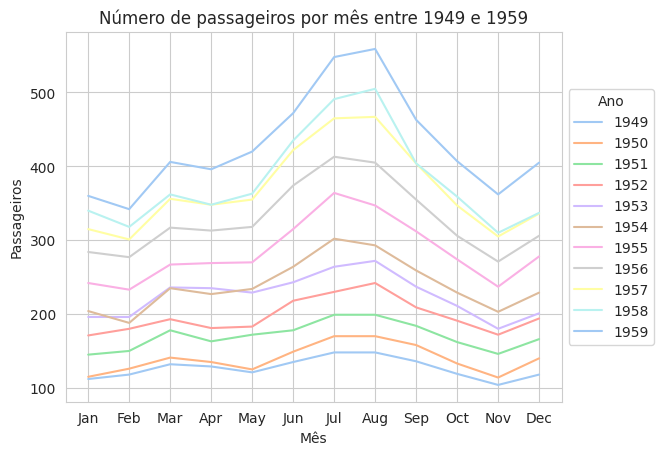

In [66]:
# gráfico do exercício 3
flights = data3.query("1949 <= year <= 1959")

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
  grafico.set(title='Número de passageiros por mês entre 1949 e 1959', xlabel='Mês', ylabel='Passageiros');
  grafico.get_legend().set_title("Ano");
  sns.move_legend(grafico,"center right", bbox_to_anchor=(1.2,0.5))

**Insight do gráfico 3**: O gráfico de linhas para cada ano indica maior número de passageiros em julho e agosto e menor número novembro, fevereiro e janeiro. Este padrão sazonal acompanha todos os anos selecionados, podendo ser melhor avaliado junto com o gráfico abaixo, onde as linhas estão agregadas e normalizadas pelo lineplot do Seaborn.

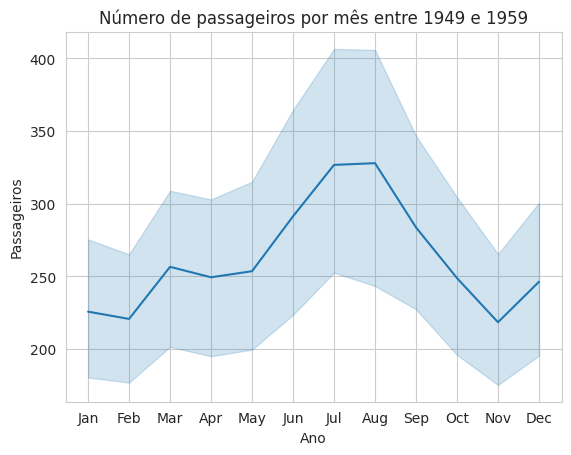

In [67]:
# outra vizualização de gráfico do exercício 3
with sns.axes_style('whitegrid'):

  flights = sns.lineplot(x='month', y='passengers', data=data3[(data3['year'] >= 1949) & (data3['year'] <= 1959)])
  flights.set(title='Número de passageiros por mês entre 1949 e 1959', xlabel='Ano', ylabel='Passageiros');


---